In [9]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Downloads different corporas.
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [4]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [5]:
df = pd.read_csv('tweets.csv')
target = df['is_there_an_emotion_directed_at_a_brand_or_product']
text = df['tweet_text']

fixed_text = text[pd.notnull(text)]
fixed_target = target[pd.notnull(text)]

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
count_vect.fit(fixed_text)

counts = count_vect.transform(fixed_text)

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(counts, fixed_target)

print(nb.predict(count_vect.transform(["this is fantastic"])))
print(nb.predict(count_vect.transform(["iphone not not bad"])))
print(nb.predict(count_vect.transform(["iphone cost too much!!!"])))

print(nb.predict(count_vect.transform(["iphone is not good"])))
print(nb.predict(count_vect.transform(["iphone is not good"])))


['Positive emotion']
['No emotion toward brand or product']
['Negative emotion']
['Positive emotion']
['Positive emotion']


In [7]:
df.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


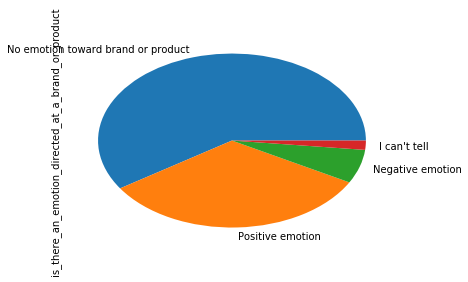

In [14]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].fillna("NaN").value_counts().plot.pie()
plt.show()